In [1]:
import tensorflow as tf

In [23]:
# Batch Normalization is a technique used to improve the training of artificial neural networks by normalizing the inputs of each layer.
# It was introduced to address the internal covariate shift problem, which occurs when the distribution of inputs to a neural network layer changes during training.
# This can slow down the training process and make it more difficult to converge to a good solution.
# This change in distribution, known as internal covariate shift, can make the training process less stable and require lower learning rates for convergence.
# Batch Normalization addresses internal covariate shift by normalizing the inputs to a layer.

In [24]:
# Batch Normalization (BN) offers several benefits when used during the training of neural networks. Here are the key advantages:
# Stabilized Training:
# Batch Normalization helps stabilize and speed up the training process by reducing internal covariate shift. This allows for more consistent and faster convergence during the optimization of the neural network.
# Higher Learning Rates:
# With Batch Normalization, higher learning rates can be used without the risk of diverging during training. This enables faster convergence, as the model can take larger steps in the parameter space.
# Reduced Sensitivity to Weight Initialization:
# Batch Normalization reduces the sensitivity of the model to the choice of weight initialization. This is particularly beneficial in deep networks where finding suitable initial weights can be challenging.

In [25]:
# The working principle of Batch Normalization (BN) involves normalizing the inputs of each layer in a neural network by adjusting them to have zero mean and unit variance. Batch Normalization is applied during the training phase, and it operates on mini-batches of data. Let's discuss the key steps in the working principle of Batch Normalization:

# Normalization Step:

# Given a mini-batch of input activations for a particular layer, Batch Normalization computes the mean and standard deviation for each feature independently.
# For a feature xi in the mini-batch, the normalized value xi is calaulated by a formula.
# Scaling and Shifting:
# The normalized values are then scaled and shifted using learnable parameters: a scaling parameter γ and a shifting parameter β. These parameters allow the model to learn the optimal scaling and shifting for each feature.
# The final output  is obtained by scaling and shifting the normalized value:
# yi = γ xi(mean) + β
# Learnable Parameters (γ and β):
# The parameters γ (scale) and β (shift) are introduced to the normalized inputs to allow the model to adapt the normalized values to the specific needs of the layer.
# These parameters are learned during the training process through backpropagation and gradient descent. The model updates γ and β to minimize the loss function.
# Performs Normalization Across the Mini-Batch:
# Batch Normalization normalizes the inputs based on the statistics (mean and variance) computed across the entire mini-batch. This helps reduce internal covariate shift by making the distribution of inputs more stable during training.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [3]:
tf.config.list_physical_devices("GPU")
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU isn't available!
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [5]:
mnist = tf.keras.datasets.mnist
(x_train_full,y_train_full),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_valid,x_train = x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
x_test = x_test/255.

<Axes: >

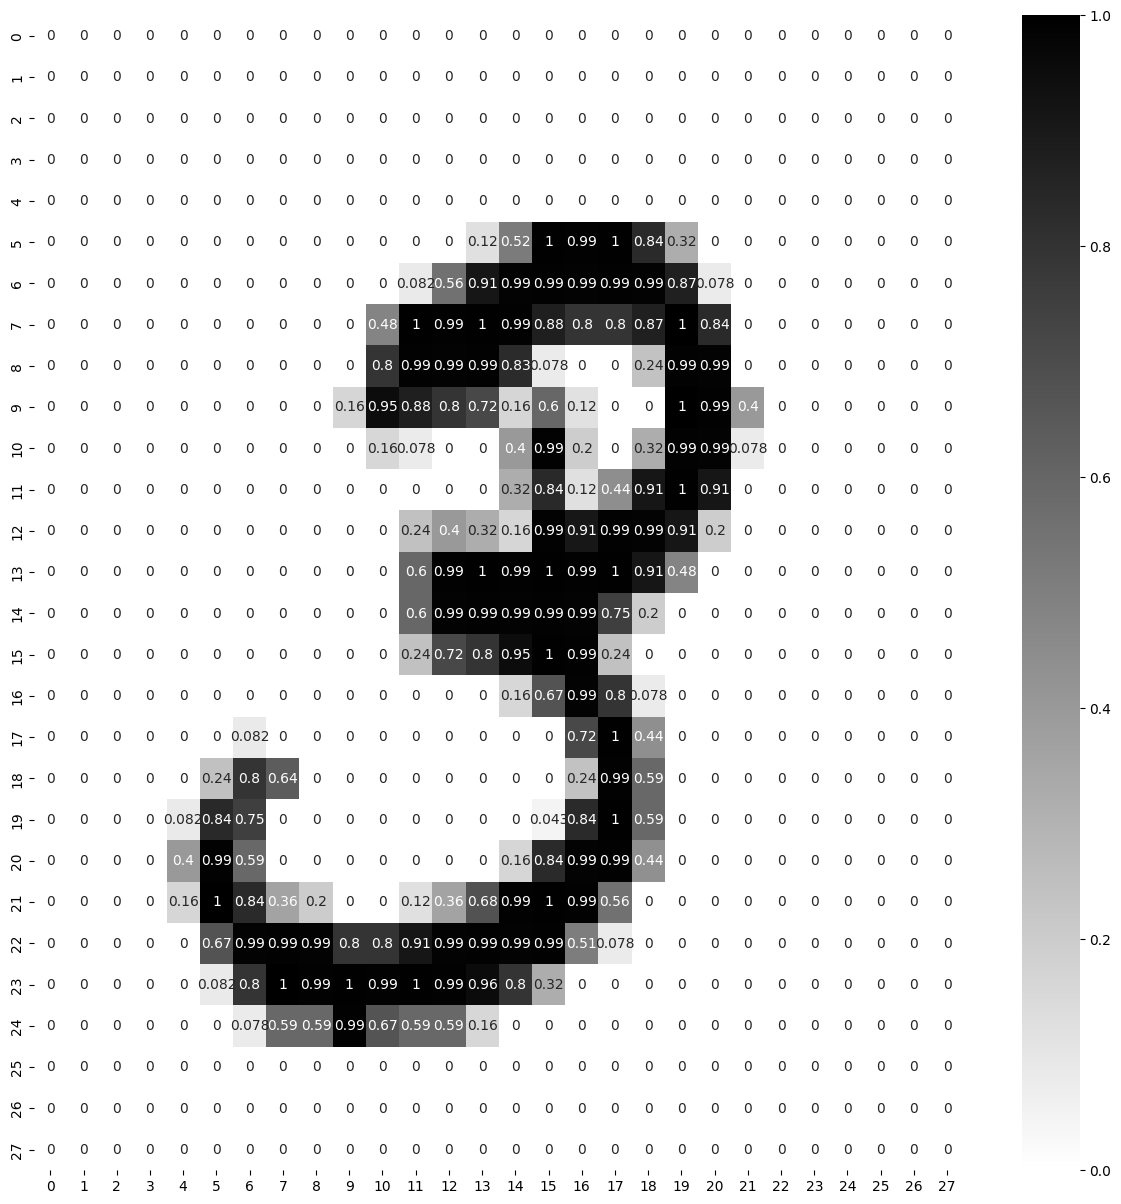

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[1],annot=True,cmap = "binary")

In [8]:
layers = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
          tf.keras.layers.Dense(300,activation = "relu",name = "hiddenlayer"),
          tf.keras.layers.Dense(100,activation = "relu" , name = "hiddenlayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]
model = tf.keras.models.Sequential(layers)

In [9]:
loss = "sparse_categorical_crossentropy"
optimizer = "SGD"
Metrics = ["accuracy"]
model.compile(loss = loss,optimizer = optimizer,metrics = Metrics)

In [10]:
epochs =30
validation_Set = (x_valid,y_valid)
history = model.fit(x_train,y_train,epochs = epochs,validation_data= validation_Set,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 11s 5ms/step - loss: 0.6211 - accuracy: 0.8396 - val_loss: 0.3128 - val_accuracy: 0.9164
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2946 - accuracy: 0.9156 - val_loss: 0.2458 - val_accuracy: 0.9320
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2410 - accuracy: 0.9314 - val_loss: 0.2081 - val_accuracy: 0.9414
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2057 - accuracy: 0.9416 - val_loss: 0.1777 - val_accuracy: 0.9496
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1789 - accuracy: 0.9489 - val_loss: 0.1608 - val_accuracy: 0.9536
Epoch 6/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.1584 - accuracy: 0.9548 - val_loss: 0.1460 - val_accuracy: 0.9572
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1413 - accuracy: 0.9598 - val_loss: 0.1315 - val_accur

<Axes: >

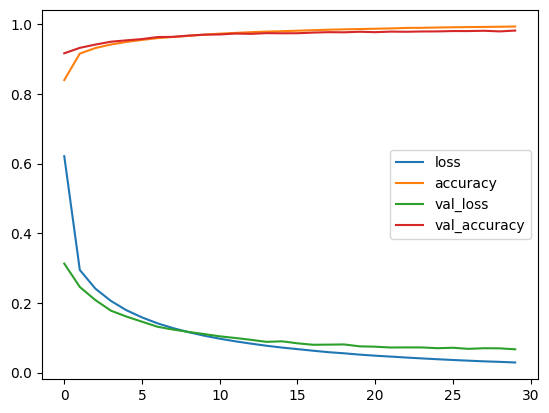

In [11]:
pd.DataFrame(history.history).plot()

In [15]:
layers_BN = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
             tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300,activation = "relu",name = "hiddenlayer"),
             tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100,activation = "relu" , name = "hiddenlayer2"),
             tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]
model = tf.keras.models.Sequential(layers_BN)

In [16]:
loss = "sparse_categorical_crossentropy"
optimizer = "SGD"
Metrics = ["accuracy"]
model.compile(loss = loss,optimizer = optimizer,metrics = Metrics)
epochs =30
validation_Set = (x_valid,y_valid)
history = model.fit(x_train,y_train,epochs = epochs,validation_data= validation_Set,batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3590 - accuracy: 0.8935 - val_loss: 0.1835 - val_accuracy: 0.9480
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1860 - accuracy: 0.9451 - val_loss: 0.1424 - val_accuracy: 0.9584
Epoch 3/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1402 - accuracy: 0.9586 - val_loss: 0.1278 - val_accuracy: 0.9632
Epoch 4/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1139 - accuracy: 0.9658 - val_loss: 0.1147 - val_accuracy: 0.9652
Epoch 5/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0947 - accuracy: 0.9713 - val_loss: 0.1089 - val_accuracy: 0.9682
Epoch 6/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0829 - accuracy: 0.9748 - val_loss: 0.1004 - val_accuracy: 0.9706
Epoch 7/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0715 - accuracy: 0.9789 - val_loss: 0.0972 - val_a

In [18]:
#batch normalisation make the accuracy of the model relatively high than the normal model and the accuracy  is acquired with in few epochs than the normal training
#normal model loss: 0.0290 - accuracy: 0.9933
#batch normalisation model loss: 0.0140 - accuracy: 0.9964

In [19]:
#as you can see the accuracy and and loss are better in the model that is batch normalisation applied as compared to normal model

In [20]:
# With Batch Normalization, higher learning rates can be used without the risk of divergence, leading to faster convergence.

In [21]:
history = model.fit(x_train,y_train,epochs = epochs,validation_data= validation_Set,batch_size=70)

Epoch 1/30
786/786 [==============================] - 7s 9ms/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0860 - val_accuracy: 0.9776
Epoch 2/30
786/786 [==============================] - 8s 10ms/step - loss: 0.0044 - accuracy: 0.9996 - val_loss: 0.0836 - val_accuracy: 0.9776
Epoch 3/30
786/786 [==============================] - 6s 8ms/step - loss: 0.0041 - accuracy: 0.9997 - val_loss: 0.0837 - val_accuracy: 0.9776
Epoch 4/30
786/786 [==============================] - 8s 10ms/step - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.0834 - val_accuracy: 0.9774
Epoch 5/30
786/786 [==============================] - 7s 9ms/step - loss: 0.0038 - accuracy: 0.9997 - val_loss: 0.0830 - val_accuracy: 0.9782
Epoch 6/30
786/786 [==============================] - 8s 10ms/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 0.0805 - val_accuracy: 0.9782
Epoch 7/30
786/786 [==============================] - 6s 8ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.0811 - val_accuracy: 0.9786
Epo

KeyboardInterrupt: ignored

In [22]:
# if we increase the batch size the accuracy is acquired in less time and here the 99.9 accuracy is reached in the first epoch it self and if we  decrease the batch size the accuracy is reached in relatively more time and by increasing the batch size also increase the computational complexity